6132 Курицын Никита


In [ ]:
pip install numpy

In [ ]:
pip install imblearn

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [1]:
import numpy as np
import os

In [23]:
import warnings
import matplotlib.pyplot as plt

In [24]:
import sklearn

In [25]:
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) # игнорируем ошибки при подсчета метрик

In [3]:
def load_data(folder):
    x_train = np.load(os.path.join(folder, 'x_train.npy'))
    y_train = np.load(os.path.join(folder, 'y_train.npy'))    
    x_test = np.load(os.path.join(folder, 'x_test.npy'))    
    y_test = np.load(os.path.join(folder, 'y_test.npy'))    
    return x_train, y_train, x_test, y_test

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class LogisticRegression:
    def __init__(self, dim=2):
        # dim - размерность входных данных.
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b  # logits
        p = sigmoid(x)  # probabilities
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')
        
    def fit(self, x, y, iters=100, lr=0.01):
        # x - np.array размерности [N, dim]
        #     Массив входных признаков.
        # y - np.array размернсоти [N]
        #     Массив меток (правильных ответов).
        # Алгоритм градиентного спуска.
        # Минимизируется бинарная кросс-энтропия.
        y = y.reshape(-1, 1)
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * np.mean(x.T.dot(preds - y), axis=1, keepdims=True)
            self.b -= lr * np.mean(preds - y, axis=0)

## 1. Применение логистической регрессии (несбалансированные данные)

### 1.1 Создание и обучение логистической регрессии

In [5]:
# Указание: производить нормализацию данных не нужно, это часть задания.
x_train, y_train, x_test, y_test = load_data('lr1_dataset1')

In [6]:
# Создайте модель логистической регрессии и обучите её, используя метод fit.
my_LogisticRegression = LogisticRegression(x_train.shape[1])# создаем модель, передавая кол-во признаков у объекта
my_LogisticRegression.fit(x_train, y_train)# обучаем на тренировочных данных

In [91]:
 print(
        f"y_test\nЧисло экземпляров класса 1 --> {sum(y_test)}   Число экземпляров  класса 0 --> {y_test.shape[0] - sum(y_test)} ")

y_test
Число экземпляров класса 1 --> 20.0   Число экземпляров  класса 0 --> 200.0 


In [ ]:
# Получите предсказания на тестовой выборке и оцените точность модели, 
# используя accuracy_score из пакета SciKit-Learn.
y_fit_LogReg = my_LogisticRegression.predict(x_test)# с помощью метода predict получаем массив предсказанных значений
accuracy_score_LogReg = accuracy_score(y_test, y_fit_LogReg)# считаем точность работы классификатора

In [27]:
 print(
        f"Результаты логистической регрессии на тестовой выборке:\nЧисло экземпляров  класса 1 --> {sum(y_fit_LogReg)}   Число экземпляров  класса 0 --> {y_fit_LogReg.shape[0] - sum(y_fit_LogReg)} Точность  --> {accuracy_score_LogReg}")

Результаты логистической регрессии на тестовой выборке:
Число экземпляров  класса 1 --> [15]   Число экземпляров  класса 0 --> [205] Точность  --> 0.9045454545454545


Точность логистической регрессии на несбалансированной выборке составила: **0.9045454545454545**

### 1.2 Анализ качества модели

Этот классификатор не использует никакой информации из данных и всегда делает одинаковое предсказание, игнорируя признаки. 

In [10]:
# Допишите класс "глупого классификатора", что всегда предсказывает класс `0`. 
class DummyClassifier:
    def __init__(self):
        print('Привет, я тебе предскажу все 0 !!!!!')

    def predict(self, x):
        return np.zeros((x.shape[0],))# всегда возвращаем массив нулей размерностью кол-ва входных строк

    def fit(self, x, y, iters=100, lr=0.01):#о бучение не нужно!!!
        print("Так лень....\n")

In [90]:
 print(
        f"y_test\nЧисло экземпляров класса 1 --> {sum(y_test)}   Число экземпляров  класса 0 --> {y_test.shape[0] - sum(y_test)} ")

y_test
Число экземпляров класса 1 --> 20.0   Число экземпляров  класса 0 --> 200.0 


In [12]:
# Оцените точность "глупого классификатора", объясните результат.
my_DummyClassifier = DummyClassifier()# создаем модель
my_DummyClassifier.fit(x_train, y_train) # для приличия обучим её)
y_fit_DummyClass = my_DummyClassifier.predict(x_test) # получаем результаты на тестовой выборке
accuracy_score_DummyClass = accuracy_score(y_test, y_fit_DummyClass) # считаем точность классификатора

Привет, я тебе предскажу все 0 !!!!!
Так лень....



In [15]:
 print(
        f"Результаты 'глупого классификатора' на тестовой выборке:\nЧисло экземпляров  класса 1 --> {sum(y_fit_DummyClass)}   Число экземпляров  класса 0 --> {y_fit_DummyClass.shape[0] - sum(y_fit_DummyClass)} Точность  --> {accuracy_score_DummyClass}")

Результаты 'глупого классификатора' на тестовой выборке:
Число экземпляров  класса 1 --> 0.0   Число экземпляров  класса 0 --> 220.0 Точность  --> 0.9090909090909091


In [31]:
# Используйте дополнительные метрики из пакета sklearn для анализа "глупого классификатора".
report_DummyClassifier = classification_report(y_test, y_fit_DummyClass) # используем функцию отчета о классификаторе, которая подсчитает все метрики
confusion_DummyClass = confusion_matrix(y_test, y_fit_DummyClass) # используем функцию, которая вернет матрицу ошибок

In [83]:
print(f"Метрики глупого классификатора:\n{report_DummyClassifier}")

Метрики глупого классификатора:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       200
         1.0       0.00      0.00      0.00        20

    accuracy                           0.91       220
   macro avg       0.45      0.50      0.48       220
weighted avg       0.83      0.91      0.87       220



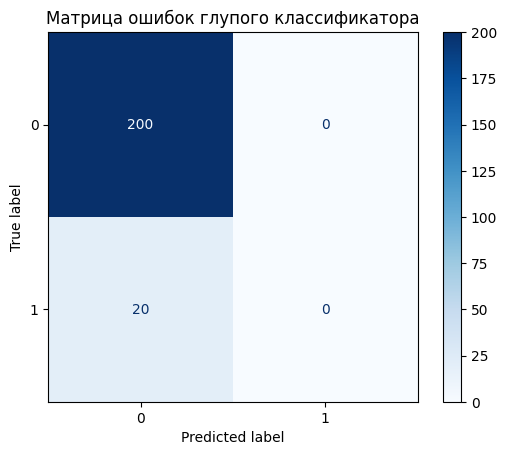

In [34]:
disp_DummyClassifier = ConfusionMatrixDisplay(confusion_DummyClass, display_labels=[0, 1])# визуализируем  матрицу ошибок
disp_DummyClassifier.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок глупого классификатора')
plt.show()

In [35]:
# Используя те же метрики, проанализируйте модель логистической регрессии. Объясните результат.
report_LogReg = classification_report(y_test, y_fit_LogReg)# используем функцию отчета о классификаторе, которая подсчитает все метрики
confusion_LogReg = confusion_matrix(y_test, y_fit_LogReg)# используем функцию, которая вернет матрицу ошибок

In [86]:
print(f"Метрики логистической регрессии:\n{report_LogReg}")
print(f"Метрики глупого классификатора:\n{report_DummyClassifier}")

Метрики логистической регрессии:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       200
         1.0       0.47      0.35      0.40        20

    accuracy                           0.90       220
   macro avg       0.70      0.66      0.67       220
weighted avg       0.89      0.90      0.90       220

Метрики глупого классификатора:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       200
         1.0       0.00      0.00      0.00        20

    accuracy                           0.91       220
   macro avg       0.45      0.50      0.48       220
weighted avg       0.83      0.91      0.87       220



Text(0.5, 1.0, 'Матрица ошибок глупого классификатора')

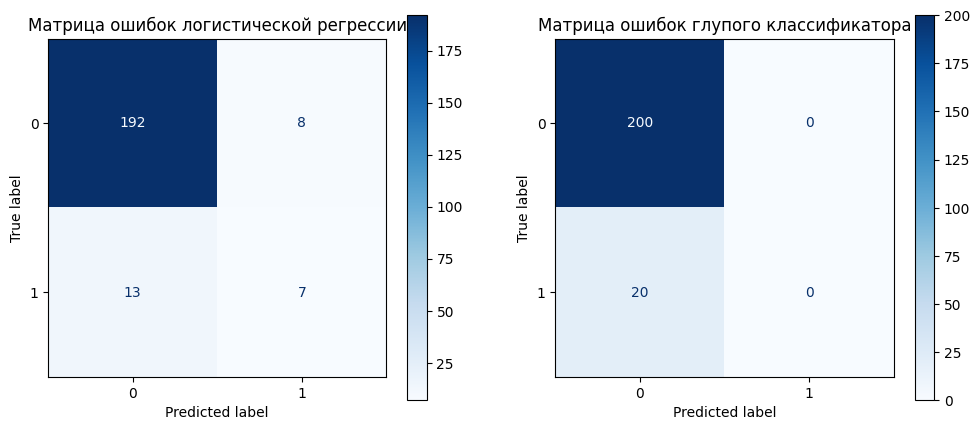

In [87]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp_LogReg.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок логистической регрессии')

disp_DummyClassifier.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок глупого классификатора')

Логистическая регрессия предсказала верно *199* объектов из 220, когда "глупый классификатор" *200* из 220, поэтому и общая точность у "глупого" 0.91 против точности 0.9 регрессии. Но при этом, как ни странно, регрессия немного научилась предсказывать первый класс (с точностью 0.47 и полнотой в 0.35).

### 1.3 Анализ набора данных

In [88]:
# Посчитайте количество экземпляров данных для каждого класса.
print(
        f"y_test\nЧисло экземпляров класса 1 --> {sum(y_test)}   Число экземпляров  класса 0 --> {y_test.shape[0] - sum(y_test)} ")

y_test
Число экземпляров класса 1 --> 20.0   Число экземпляров  класса 0 --> 200.0 


In [89]:
print(
        f"y_train\nЧисло экземпляров класса 1  --> {sum(y_train)}   Число экземпляров  класса 0 --> {y_train.shape[0] - sum(y_train)} ")

y_train
Число экземпляров класса 1  --> 20.0   Число экземпляров  класса 0 --> 200.0 


In [45]:
from imblearn.over_sampling import SMOTE# импортирую метод для генерации дубликатов

**SMOTE**  (Synthetic Minority Over-sampling Technique) - это метод генерации синтетических объектов для балансировки классов в задачах классификации

In [98]:
# Предложите способ улучшения качества модели. Подсказка: добавление дубликатов в данные.
# sampling_strategy=1 - значит отношения минорного класса к доминирующему классу
# k_neighbors=5 -  этот параметр определяет количество ближайших соседей, которые будут использоваться для генерации синтетических объектов
# random_state=4 - обеспечивает воспроизводимость разделения
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=4)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [99]:
print(
        f"y_resampled\nЧисло экземпляров класса 1 --> {sum(y_resampled)}   Число экземпляров  класса 0 --> {y_resampled.shape[0] - sum(y_resampled)} ")

y_resampled
Число экземпляров класса 1 --> 200.0   Число экземпляров  класса 0 --> 200.0 


In [72]:
# Создайте и обучите модель с использованием предложенных наработок.
new_LogisticRegression = LogisticRegression(x_resampled.shape[1])# создаем модель, передавая кол-во признаков у объекта
new_LogisticRegression.fit(x_resampled, y_resampled)# обучаем на тренировочных данных

In [73]:
# Оцените качество новой модели, используя метрики из пакета sklearn.metrics. 
new_y_fit_LogReg = new_LogisticRegression.predict(x_test)# с помощью метода predict получаем массив предсказанных значений
new_accuracy_score_LogReg = accuracy_score(y_test, new_y_fit_LogReg)# считаем точность работы классификатора

In [74]:
print(
        f"Результаты логистической регрессии на тестовой выборке:\nЧисло экземпляров  класса 1 --> {sum(new_y_fit_LogReg)}   Число экземпляров  класса 0 --> {new_y_fit_LogReg.shape[0] - sum(new_y_fit_LogReg)} Точность  --> {new_accuracy_score_LogReg}")

Результаты логистической регрессии на тестовой выборке:
Число экземпляров  класса 1 --> [19]   Число экземпляров  класса 0 --> [201] Точность  --> 0.9318181818181818


In [75]:
new_report_LogReg = classification_report(y_test, new_y_fit_LogReg)
new_confusion_LogReg = confusion_matrix(y_test, new_y_fit_LogReg)

Text(0.5, 1.0, 'Матрица ошибок логистической регрессии')

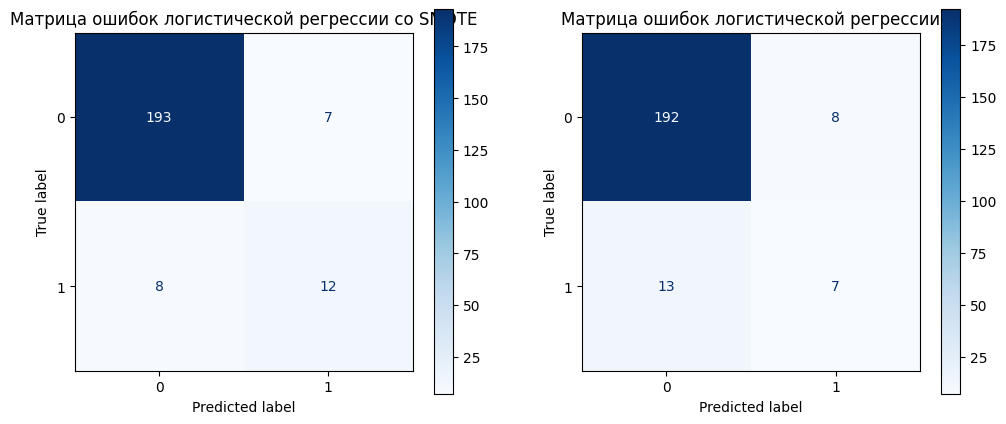

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
new_disp_LogReg.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Матрица ошибок логистической регрессии со SMOTE')

disp_LogReg.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Матрица ошибок логистической регрессии')

In [93]:
print(f"Метрики логистической регрессии со SMOTE:\n{new_report_LogReg}\n")
print(f"Метрики логистической регрессии:\n{report_LogReg}")

Метрики логистической регрессии со SMOTE:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       200
         1.0       0.63      0.60      0.62        20

    accuracy                           0.93       220
   macro avg       0.80      0.78      0.79       220
weighted avg       0.93      0.93      0.93       220


Метрики логистической регрессии:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       200
         1.0       0.47      0.35      0.40        20

    accuracy                           0.90       220
   macro avg       0.70      0.66      0.67       220
weighted avg       0.89      0.90      0.90       220



Из метрик и матриц ошибок видно, что благодаря методу SMOTE удалось поднять точность до 0.93 c 0.9, при этом число верных предсказания возрасло на 6 (до 205 изи 220). Точность предсказания первого класса выросла с 0.47 до 0.63 (с 7 до 12 верно предсказанных объектов). Точность предсказания нулеовго класса выросла с 0.94 до 0.96 (с 192 до 193 верно предсказанных объектов). **Можно сказать**, что модель благодаря увеличению числа объектов минорного класса до числа объектов доминирующего класса, начала лучше предсказывать объекты первого класса.

## 2. Применение логистической регрессии (нелинейные данные)

In [112]:
x_train, y_train, x_test, y_test = load_data('lr1_dataset2')

In [113]:
# Создайте и обучите модель но этом наборе данных.
nonlinear_model_LogisticRegression = LogisticRegression(x_train.shape[1])
nonlinear_model_LogisticRegression.fit(x_train, y_train)
nonlinear_y_fit_LogReg = nonlinear_model_LogisticRegression.predict(x_test)

In [114]:
# Проанализируйте качество модели.
report_nonlinear_model_LogisticRegression = classification_report(y_test, nonlinear_y_fit_LogReg)  # используем функцию отчета о классификаторе, которая подсчитает все метрики
confusion_nonlinear_model_LogisticRegression = confusion_matrix(y_test, nonlinear_y_fit_LogReg)  # используем функцию, которая вернет матрицу ошибок

In [115]:
print(f"Метрики логистической регрессии на нелинейных данных:\n{report_nonlinear_model_LogisticRegression}\n")

Метрики логистической регрессии на нелинейных данных:
              precision    recall  f1-score   support

         0.0       0.80      0.07      0.13        55
         1.0       0.46      0.98      0.63        45

    accuracy                           0.48       100
   macro avg       0.63      0.53      0.38       100
weighted avg       0.65      0.48      0.36       100




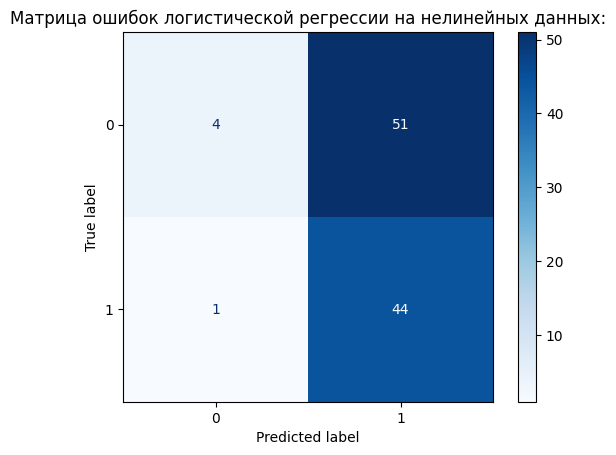

In [116]:
disp_nonlinear_model_LogisticRegression = ConfusionMatrixDisplay(confusion_nonlinear_model_LogisticRegression, display_labels=[0, 1])# визуализируем  матрицу ошибок
disp_nonlinear_model_LogisticRegression.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок логистической регрессии на нелинейных данных:')
plt.show()

Text(0.5, 1.0, 'Предсказанные объекты')

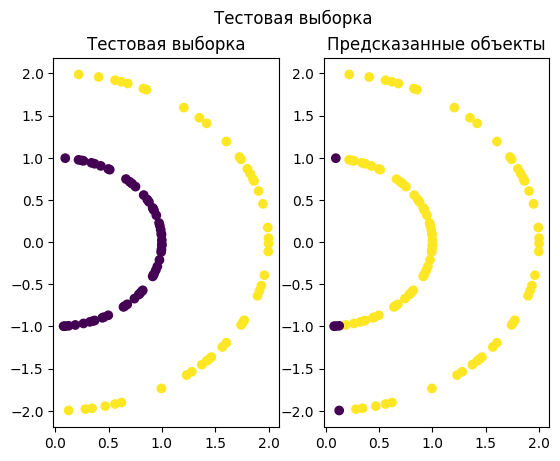

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Тестовая выборка')
ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax1.set_title('Тестовая выборка')

ax2.scatter(x_test[:, 0], x_test[:, 1], c=nonlinear_y_fit_LogReg)
ax2.set_title('Предсказанные объекты')

Т.к. данные нелинейные у логистической регрессии не получилось правильно построить прямую для классификации двух объектов. Точность составила **0.46**, благодаря большому количеству правильно предсказанных объектов класса 1. Из класса 0 всего верно классифицировано 4. 

In [118]:
# FEATURE ENGINEERING: попробуйте применить на исходных данных разные нелинейные функции (sin, tanh, x^2, ...).
# Объедините трансформированные данные с исходными.
sign_x_train = x_train[:, 0].reshape(x_train.shape[0], 1)
sign_y_train = np.cos(x_train[:, 1]).reshape(x_train.shape[0], 1)# применяю на втором признаке объектов из тренировочной выборки косинус

sign_x_test = x_test[:, 0].reshape(x_test.shape[0], 1)
sign_y_test = np.cos(x_test[:, 1]).reshape(x_test.shape[0], 1)# применяю на втором признаке объектов из тестовой выборки косинус

x_train_transformed = np.hstack((sign_x_train, sign_y_train))
x_test_transformed = np.hstack((sign_x_test, sign_y_test))

Text(0.5, 1.0, 'Тестовая выборка')

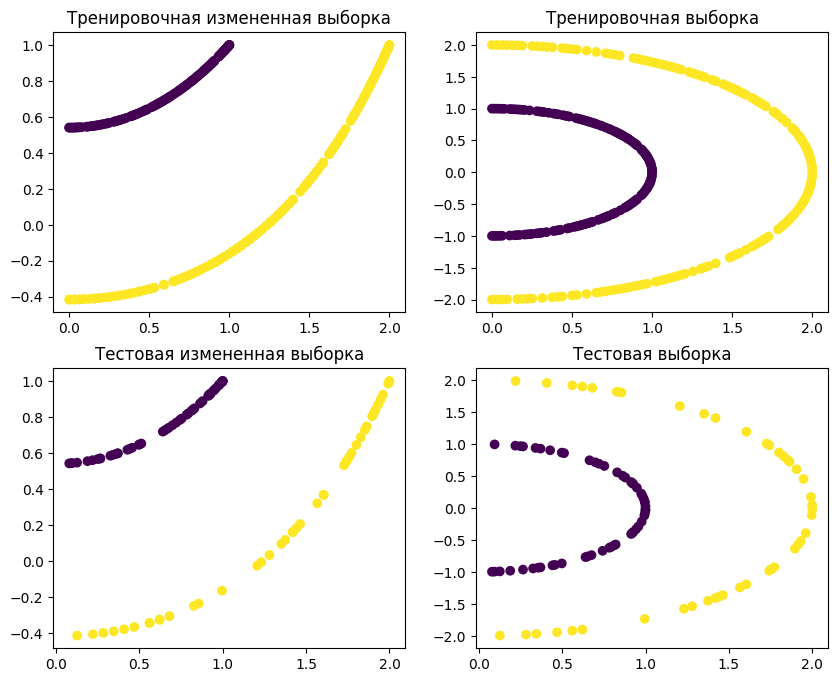

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train)
axes[0, 0].set_title('Тренировочная измененная выборка')

axes[0, 1].scatter(x_train[:, 0], x_train[:, 1], c=y_train)
axes[0, 1].set_title('Тренировочная выборка')

axes[1, 0].scatter(x_test_transformed[:, 0], x_test_transformed[:, 1], c=y_test)
axes[1, 0].set_title('Тестовая измененная выборка')

axes[1, 1].scatter(x_test[:, 0], x_test[:, 1], c=y_test)
axes[1, 1].set_title('Тестовая выборка')

In [119]:
# Создайте и обучите модель с использованием наработок.
transformed_model_LogisticRegression = LogisticRegression(2)
transformed_model_LogisticRegression.fit(x_train_transformed, y_train)
transformed_y_fit_LogReg = transformed_model_LogisticRegression.predict(x_test_transformed)

In [120]:
# Оцените качество новой модели, используя метрики из пакета sklearn.metrics. 
report_transformed_model_LogisticRegression = classification_report(y_test, transformed_y_fit_LogReg)  # используем функцию отчета о классификаторе, которая подсчитает все метрики
confusion_transformed_model_LogisticRegression = confusion_matrix(y_test, transformed_y_fit_LogReg)  # используем функцию, которая вернет матрицу ошибок

In [121]:
print(f"Метрики логистической регрессии:\n{report_transformed_model_LogisticRegression}\n")

Метрики логистической регрессии:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100




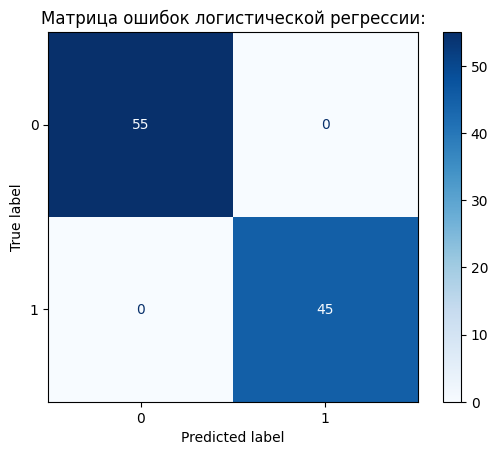

In [123]:
disp_transformed_model_LogisticRegression = ConfusionMatrixDisplay(confusion_transformed_model_LogisticRegression, display_labels=[0, 1])# визуализируем  матрицу ошибок
disp_transformed_model_LogisticRegression.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок логистической регрессии:')
plt.show()

Text(0.5, 1.0, 'Предсказанные объекты')

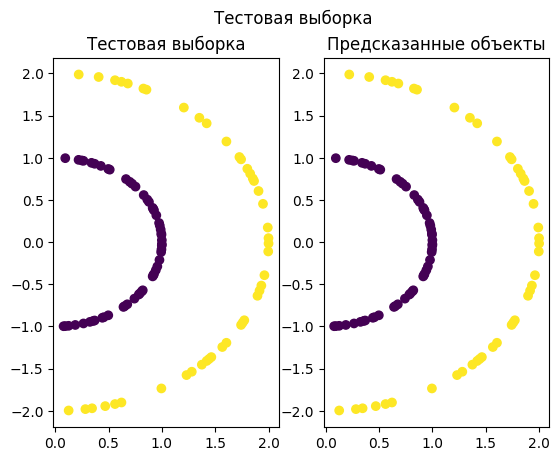

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Тестовая выборка')
ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax1.set_title('Тестовая выборка')

ax2.scatter(x_test[:, 0], x_test[:, 1], c=transformed_y_fit_LogReg)
ax2.set_title('Предсказанные объекты')

Благодаря изменению данных, а именно применение функции *cos* на втором признаке (ось Oy на графике) удалось достичь **100%** точности классификатора,т.к. данные разделились, что сделало задачу классификации гораздо более простой для логистической регрессии.

## 3. Доп. задания (любое на выбор, опционально)

### 3.1 'Упрощение' логистической регрессии

Сложность: легко.

In [143]:
# Модифицируйте класс логистической регрессии так, чтобы в нём не использовалась сигмоида.
# То есть вывод о предсказанном классе должен делаться на основе значений "до сигмоиды".
# Вспомогательная ссылка: https://en.wikipedia.org/wiki/Logit
# Подсказка: взгляните на то, при каких входных `x` значение сигмоды больше 0.5 и меньше 0.5.

class LogisticRegression:
    def __init__(self, dim=2):
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        return np.array(x > 0.0).astype('int32')# если x больше 0, то будет 1
        
    def fit(self, x, y, iters=100, lr=0.01):
        y = y.reshape(-1, 1)
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * np.mean(x.T.dot(preds - y), axis=1, keepdims=True)
            self.b -= lr * np.mean(preds - y, axis=0)

In [156]:
# Повторите эксперимент из задания 1.
x_train, y_train, x_test, y_test = load_data('lr1_dataset1')
my_LogisticRegression = LogisticRegression(x_train.shape[1])
my_LogisticRegression.fit(x_train, y_train)

In [157]:
 print(
        f"y_test\nЧисло экземпляров класса 1 --> {sum(y_test)}   Число экземпляров  класса 0 --> {y_test.shape[0] - sum(y_test)} ")

y_test
Число экземпляров класса 1 --> 20.0   Число экземпляров  класса 0 --> 200.0 


In [158]:
y_fit_LogReg = my_LogisticRegression.predict(x_test)  # с помощью метода predict получаем массив предсказанных значений
accuracy_score_LogReg = accuracy_score(y_test, y_fit_LogReg)  # считаем точность работы классификатора

In [159]:
 print(
        f"Результаты логистической регрессии на тестовой выборке:\nЧисло экземпляров  класса 1 --> {sum(y_fit_LogReg)}   Число экземпляров  класса 0 --> {y_fit_LogReg.shape[0] - sum(y_fit_LogReg)} Точность  --> {accuracy_score_LogReg}")

Результаты логистической регрессии на тестовой выборке:
Число экземпляров  класса 1 --> [18]   Число экземпляров  класса 0 --> [202] Точность  --> 0.9090909090909091


Убрав сигмоиду и заметив, что при значения x меньше нуля вероятность будет меньше 0.5, удалось поднять точность до **0.909** против **0.904** с сигмойдой. 

### 3.2 'Обобщение' логистической регрессии

Напишите многоклассовый классификатор. Обучите его на наборе данных ниже.

In [23]:
x_train, y_train, x_test, y_test = load_data('lr1_dataset3')

<b>Ансамбль логистических регрессий.</b> Сложность: супергерой.

In [24]:
"""
Напишите класс, что инкапсулирует в себе `C` логистических регрессий, 
где `C` - количество классов. i-ая логистическая регрессия производит 
бинарную классификацию вида: все остальные классы и i-ый класс.
"""

class MulticlassLogisticRegression:
    def __init__(self, n_classes, dim):
        pass
    
    def predict(self, x):
        # x - numpy массив размерности [N, dim]
        # Возвращается массив целых чисел размерности [N],
        # где i-ый элемент обозначает номер класса для 
        # i-го экземпляра данных в `x`.
        pass
    
    def fit(self, x, y):
        pass

In [25]:
# Создайте и обучите написанный классификатор. Оцените точность модели.


<b>Softmax классификатор.</b> Сложность: математический гений.

In [26]:
"""
Напишите класс классификатора, основанного на функции Softmax.
Алгоритм работы данного классификатора:
x - вектор (экземпляр данных) размерности dim.
W - матрица весов размерности [dim, n_classes].

Ответ классификатора формируется как:
logits = x * W - матричное умножение
p = softmax(logits)
class_id = argmax(p)

Для данного классификатора требуется модифицировать алгоритм обучения в методе fit.

Вспомогательные ресурсы:
https://en.wikipedia.org/wiki/Softmax_function
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
"""

class SoftmaxClassificator:
    def __init__(self, n_classes, dim):
        pass
    
    def predict(self, x):
        # x - numpy массив размерности [N, dim]
        # Возвращается массив целых чисел размерности [N],
        # где i-ый элемент обозначает номер класса для 
        # i-го экземпляра данных в `x`.
        pass
    
    def fit(self, x, y):
        pass

In [27]:
# Создайте и обучите написанный классификатор. Оцените точность модели.


In [28]:
# Создайте и обучите написанный классификатор на наборе данных из задания 1 (опционально). Оцените точность модели.
class NaiveGauss(NaiveBayes):
     # Вычисляет P(x) - безусловная вероятность появления x.
    def compute_marginal_probability(self, x) -> float:
        marginal_prob = 0.0
        for c in range(self.n_classes):
            marginal_prob += self.compute_prior(c) * self.compute_likelihood(x,c)
        return marginal_prob
    # Вычисляет P(c) - априорная вероятность появления класса c.
    def compute_prior(self, c) -> float:
        assert abs(sum(self.params['prior']) - 1.0) < 1e-3, \
            f"Sum of prior probabilities must be equal to 1, but is {sum(self.params['prior'])}"
        assert c < self.n_classes, f'Class index must be < {self.n_classes}, but received {c}.'
        # Напишите свой код здесь
        return self.params['prior'][c]

    def x_i_likelihood(self, x_i, c, feature_id) -> float:
        return norm.pdf(x_i,self.params['mean'][c,feature_id],self.params['disp'][c,feature_id])
        
    # Вычисляет P(x|c) - вероятность наблюдения экземпляра x в предположении, что он принаждлежит c.
    def compute_likelihood(self, x, c) -> float:
        assert c < self.n_classes, f'Class index must be < {self.n_classes}, but received {c}.'
        # Напишите свой код здесь
        likelihood = 1.0
        for feature_id in range(x_train.shape[1]):
            likelihood *= self.x_i_likelihood(x[feature_id],c,feature_id)
        return likelihood
        
    # --- FITTING ---
    
    def _estimate_prior(self, y):
        # Значения априорных вероятностей сохраните в `params` с ключом 'prior'
        # Напишите свой код здесь
        self.params['prior'] = np.bincount(y)/len(y)
        
    
    def _estimate_params(self, x, y):
        # Напишите свой код здесь
        self.params['mean'] = np.zeros((self.n_classes,x.shape[1]))
        self.params['disp'] = np.zeros((self.n_classes,x.shape[1]))
        for c in range(self.n_classes):
            class_C = x[c==y]
            for feature_id in range(x_train.shape[1]):
                self.params['mean'][c,feature_id] = np.mean(class_C[:,feature_id])
                self.params['disp'][c,feature_id] = np.std(class_C[:,feature_id])
    def pr(self):
        print(self.params)